# Cálculo Numérico - 2021.2 - Tarefa 5 - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390
## Questões discutidas com: Beatriz Almeida Ramos, Carlos Bravo, Matheus Barroso

# Exercício 1

Para este exercício, devemos determinar uma curva na forma $T = c_{0}x^{c_{1}}$ o qual melhor se ajusta nos dados fornecidos utilizando o método de mínimos quadrados com coeficientes não-lineares. Em seguida, devemos utilizar o modelo estipulado para calcular T(0.3) com 3 casas decimais.

No primeiro passo, podemos importar de nossa biblioteca as funções vandermonde e regressão para calcular o sistema correspendente utilizando mínimos quadrados com coeficientes não-lineares. Para isto, utilizaremos as entradas $x$ e $y$ na forma $\overline{x} = ln(x)$ e $\overline{y} = ln(y)$ para fazer a transformada do caso não-linear para linear.

In [2]:
using Plots
using LinearAlgebra

In [3]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [8]:
function regressao(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c, grau
end

regressao (generic function with 1 method)

In [5]:
function erro_total(x,y,modelo)
    n,=size(y)
    S=0
    for i=1:n
        S=S+(y[i]-modelo(x[i]))^2
    end
    return sqrt(S)  
end

erro_total (generic function with 1 method)

In [99]:
function aproxima_funcao(x,y)
    x_barra = log.(x) # ln(x)
    y_barra = log.(y) # ln(y)
    coefs = regressao(x_barra,y_barra,1)
    return coefs
end

aproxima_funcao (generic function with 1 method)

Com isto, podemos utilizar a função aproxima função para determinar os coeficientes da aproximação da função que desejamos, atentando-se ao fato de retorná-los de volta ao não-linear utilizando a inversa da função logaritmo natural.

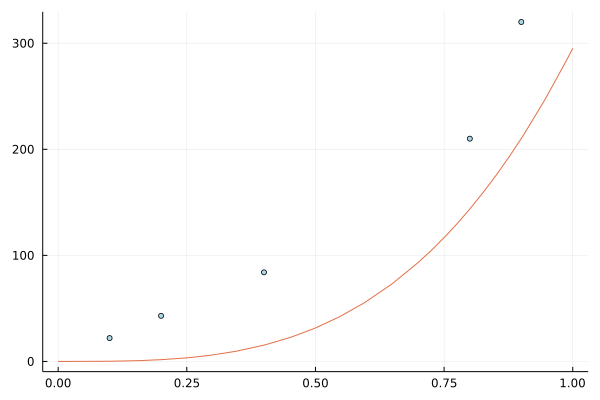

In [100]:
x = [0.1,0.2,0.4,0.8,0.9]
y = [22,43,84,210,320]

coefs, _ = aproxima_funcao(x,y)
c0 = exp(coefs[1])
c1 = exp(coefs[2])
f(x) = (c0)*(x^(c1))
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(f,0,1)

Com isto, podemos calcular $T(0.3)$.

In [52]:
f(0.3)

6.070323886168533

# Exercício 2.a)

Neste exercício, devemos utilizar os pontos descritos para encontrar uma função $f(x)$ que satisfaça os pontos dados e estimar a distância percorrida pela ônibus em $t=125$. Isto é, encontrada a função, devemos calcular $ \int_{0}^{125} (f(x) + E_{\epsilon}(x)) \,dx$ pois, integrando o gráfico velocidade, teremos a distância percorrida.

Dados os pontos utlizados, podemos importar de nossa biblioteca a função de interpolação polinomial para encontrar a função descrita em cada um dos intervalos.

In [110]:
function interpolacao_onibus(x,y,grau)
    # Cria a matriz V
    V = vandermonde(x,y,grau)
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_onibus (generic function with 3 methods)

In [84]:
function trapezio(f,a,b,n) #calcular a integral f(x) de a até b
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

trapezio (generic function with 1 method)

Com isto, podemos utilizar o método do trapézio em cada intervalo $(x_{n},x_{n+1}$ para os valores descritos. Após, basta somar as áreas encontradas.

In [64]:
using Polynomials

In [111]:
altura = 0.0
x = [0,10,15,20,32,59,62,125]
y = [0,185,319,447,742,1325,1445,4151]
xn = [0,10]
yn = [0,185]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [10,15]
yn = [185,319]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [15,20]
yn = [319,447]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [20,32]
yn = [447,742]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [32,59]
yn = [742,1325]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [59,62]
yn = [1325,1445]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [62,125]
yn = [1445,4151]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)

219567.5000000001

Com isso, temos que o ônibus espacial endeavour, no momento $t = 125$ estava na altura de aproximadamente $219567.5000000001$ pés, equivalente a aproximadamente $66.924174000000022033$ km.

# Exercício 2.b)

Para estipularmos o erro máximo cometido, precisaríamos ter como informação um $M$ tal que $f''(x) \leq M$ para todo $a \leq x \leq b$. Como não temos esta informação, é computacionalmente custoso calcular o erro máximo nas condições dadas.

# Exercício 2.c)

Para encontrarmos uma reta $p_{1} = c_{0}x+c_{1}$ que melhor descreve a distribuição dos pontos, podemos utilizar de nossa biblioteca o método da regressão. Depois disso, podemos utilizar o método do trapézio para calcular $ \int_{0}^{125} p_{1}(x) \,dx$. Vamos utilizar então a função aproxima_onibus em conjunto com a regressão.

In [103]:
function aproxima_onibus(x,y)
    coefs = regressao(x,y,1)
    return coefs
end

aproxima_onibus (generic function with 1 method)

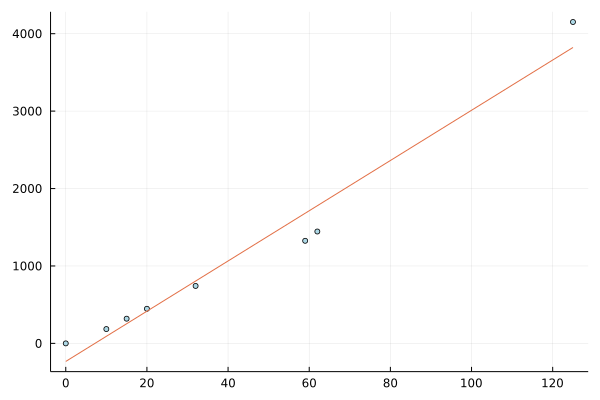

In [105]:
x = [0,10,15,20,32,59,62,125]
y = [0,185,319,447,742,1325,1445,4151]

coefs, _ = aproxima_onibus(x,y)
p = Polynomial(coefs)
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p,0,125)

Com isto, como já temos uma reta, podemos utilizar o método do trapézio de $0$ até $125$ diretamente e estimarmos a altura.

In [107]:
altura = 0.0
x = [0,10,15,20,32,59,62,125]
y = [0,185,319,447,742,1325,1445,4151]
xn = [0,125]
coefs,_ = aproxima_onibus(x,y)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)

224307.60859075942

Com isso, temos que o ônibus espacial endeavour, no momento  $𝑡 = 125$, de acordo com a aproximação pela reta, estava na altura de aproximadamente $224307.60859075942$ pés, equivalente a aproximadamente $68.368959098463491841$ km

# Exercício 3.a)

Para este exercício, precisamos determinar uma aproximação para a área limitada ao primeiro quadrante da equação $x^2 + y^2 = 1$. Como utilizaremos o método do trapézio e estamos interessados apenas no primeiro quadrante, para simplificar as contas, utilizaremos a equação equivalente ao semi-círculo formado pelos 1º e 2º quadrantes, isto é, $y = \sqrt{1 - x^2}$. Após finalizar estes cálculos, com a aproximação obtida, devemos fazer uma aproximação de $\pi$ utilizando o valor encontrado.

Para isto, adaptaremos o método do trapézio, utilizando a função trapezio_circulo, para fazer a aproximação utilizando a altura $h = 0.1$. Utilizaremos também a função interpolacao_circulo para sermos capazes de fornecer a reta para formar o trapézio.

In [113]:
function interpolacao_circulo(x,y,grau)
    # Cria a matriz V
    V = vandermonde(x,y,grau)
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_circulo (generic function with 1 method)

In [137]:
function trapezio_circulo(f,a,b) #calcular a integral f(x) de a até b
    h=0.1
    S=0.0
    for i=1:(2)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

trapezio_circulo (generic function with 2 methods)

Utilizando então os limites de integração $a=0$ e $b=1$, podemos estimar a área do primeiro quadrante.

In [138]:
x = [0,1]
y = [1,0]
coefs = interpolacao_circulo(x,y,1)
p = Polynomial(coefs)
area = trapezio_circulo(p,x[1],x[2])

-40.45

Como a parte da função do primeiro quadrante é referente a $\dfrac{\pi}{4}$, podemos multiplicar a área encontrada para dar uma estimativa de $\pi$.

In [134]:
area * 4

0.8800000000000001

# Exercício 3.b)